In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyClassifier

In [170]:
dataDF = pd.read_csv("online_shoppers_intention.csv")

In [171]:
print(dataDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

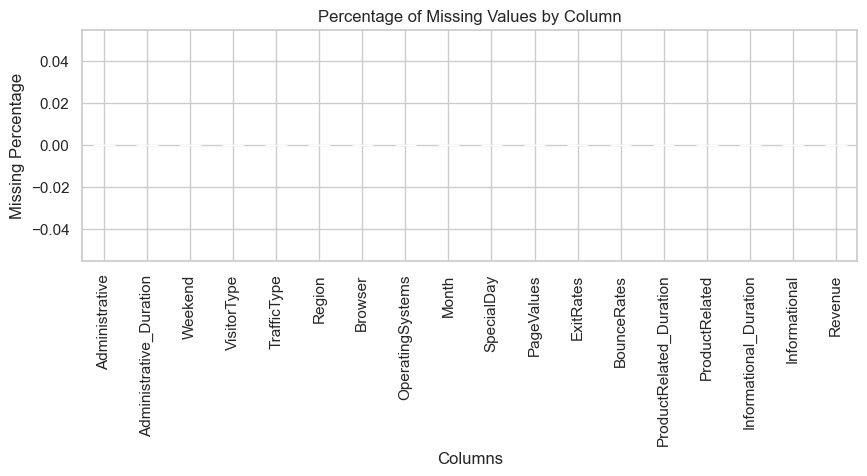

In [172]:
#Visualization for missing values analysis

missing_percentage = (dataDF.isnull().mean() * 100).sort_values(ascending=False)
plt.figure(figsize=(10, 3))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Values by Column')
plt.show()

In [173]:
# Checking for number of unique values for each feature

uniqueValues = dataDF.nunique(axis=0)
print(uniqueValues)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


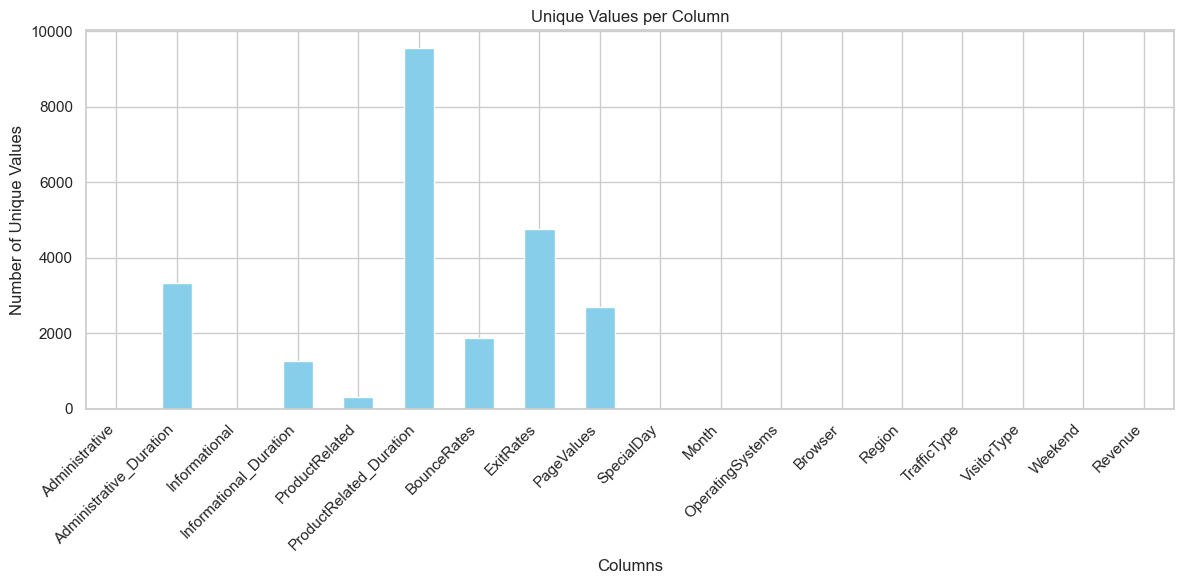

In [174]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
uniqueValues.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Unique Values per Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

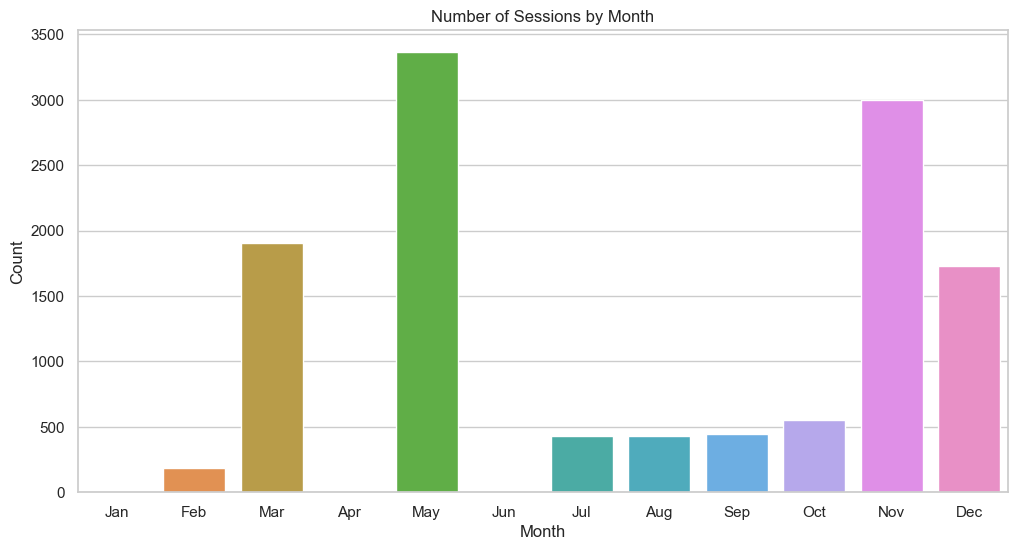

In [175]:
# Distribution of 'Month'
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=dataDF, order=month_order)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Sessions by Month')
plt.show()

In [178]:
hello = dataDF[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                     'ProductRelated', 'ProductRelated_Duration', 'PageValues']]
hello.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,5.889258
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,361.763742


In [136]:
# Drop the 'Administrative', 'Informational', and 'ProductRelated' columns because they represent the number of pages visited by the user in each of these categories.
# and the total number of pages visited is already captured by the 'PageValues' column. 
# Therefore, these columns are redundant and not useful for the analysis.
# dataDF = dataDF.drop(['Administrative', 'Informational', 'ProductRelated'], axis=1)

# There is no data for January and April, so drop column Weekend
dataDF.drop('Month', axis=1, inplace=True)

In [137]:
dataDF.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,Returning_Visitor,True,False


In [138]:
# Convert categorical variables to numerical

# Unique values for categorical variables:
# dataDF.Month.unique()
# VisitorType = 'Returning_Visitor', 'New_Visitor', 'Other'
# Weekend = True, False
# Revenue = True, False

# Label Encoding for binary variables: Weekend and Revenue -> True = 0, False = 1
dataDF['Weekend'] = dataDF['Weekend'].astype(int)
dataDF['Revenue'] = dataDF['Revenue'].astype(int)

# One-hot encoding for VisitorType: create k-1 columns to avoid multicollinearity
dataDF = pd.get_dummies(dataDF, columns=['VisitorType'], drop_first=True)
dataDF = dataDF.astype(int)

In [139]:
dataDF.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.0,12330.0,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.654339,0.503569,34.425223,31.731468,1194.366342,0.0,0.0,5.779075,0.012490,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745,0.006894,0.855718
std,3.321784,176.682517,1.270156,140.686774,44.475503,1913.616422,0.0,0.0,18.442568,0.111062,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.000000,0.0,0.0,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,598.500000,0.0,0.0,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.000000,0.000000,0.000000,38.000000,1464.000000,0.0,0.0,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.000000,24.000000,2549.000000,705.000000,63973.000000,0.0,0.0,361.000000,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
# Make sure there are no missing values

dataDF.isnull().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
Weekend                          0
Revenue                          0
VisitorType_Other                0
VisitorType_Returning_Visitor    0
dtype: int64

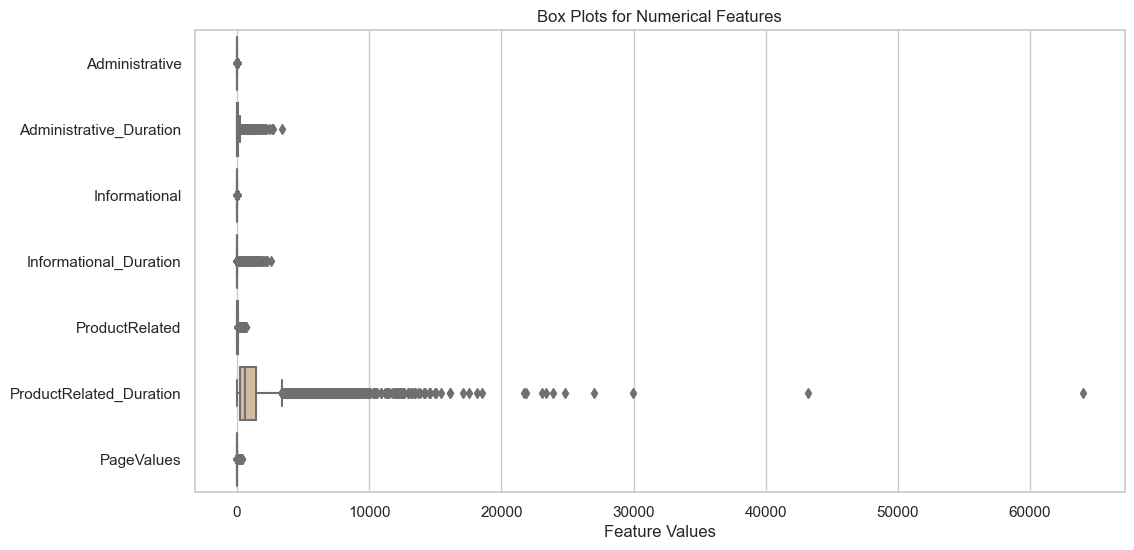

In [141]:
# Check for outliers: Box Plot Visualization

numerical_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                     'ProductRelated', 'ProductRelated_Duration', 'PageValues']

data_for_boxplot = dataDF[numerical_columns]

# Set the style of the visualization
sns.set(style="whitegrid", palette="pastel")

# Plot box plots for the original numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_for_boxplot, orient="h")
plt.title("Box Plots for Numerical Features")
plt.xlabel("Feature Values")
plt.show()

In [142]:
# Columns Administrative_Duration, Informational_Duration and ProductRelated_Duration are outliers.
# These columns are Total amount of time (in seconds) spent by the visitor.
# Convert these columns to hours.

dataDF['Administrative_Duration_hours'] = dataDF['Administrative_Duration'] / 3600
dataDF['Informational_Duration_hours'] = dataDF['Informational_Duration'] / 3600
dataDF['ProductRelated_Duration_hours'] = dataDF['ProductRelated_Duration'] / 3600

# Drop the original columns if needed
dataDF = dataDF.drop(['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], axis=1)

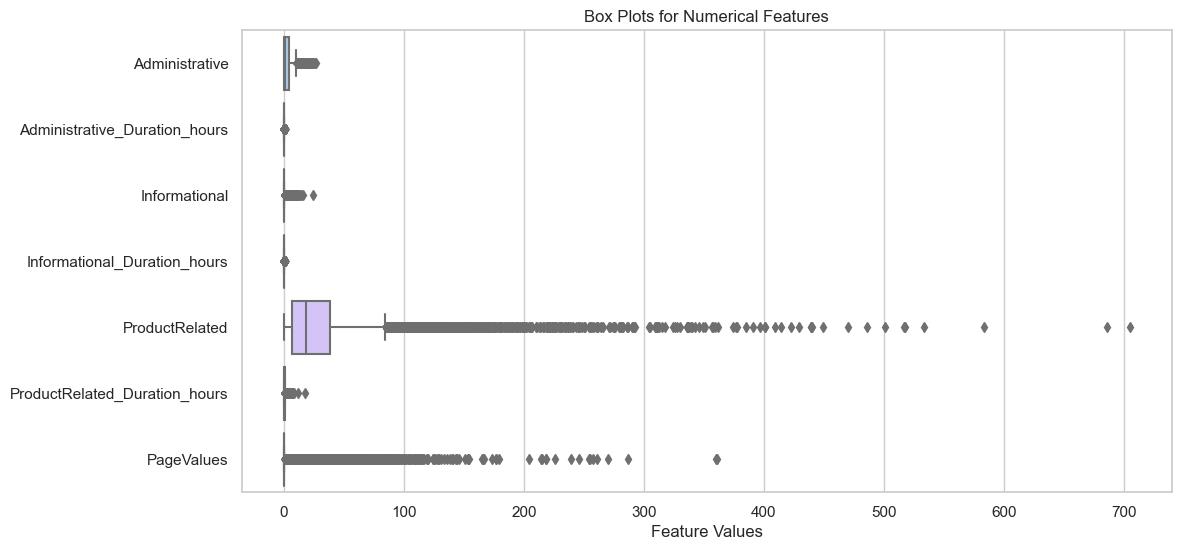

In [143]:
# Check for outliers again after converting the seconds to hours using Box Plot Visualization

numerical_columns = ['Administrative', 'Administrative_Duration_hours', 'Informational', 'Informational_Duration_hours',
                     'ProductRelated', 'ProductRelated_Duration_hours', 'PageValues']

data_for_boxplot = dataDF[numerical_columns]

# Set the style of the visualization
sns.set(style="whitegrid", palette="pastel")

# Plot box plots for the original numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_for_boxplot, orient="h")
plt.title("Box Plots for Numerical Features")
plt.xlabel("Feature Values")
plt.show()

# Conclusion: Administrative_Duration_hours, Informational_Duration_hours, ProductRelated_Duration_hours are now in a good range

In [144]:
dataDF.describe()

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor,Administrative_Duration_hours,Informational_Duration_hours,ProductRelated_Duration_hours
count,12330.000000,12330.000000,12330.000000,12330.0,12330.0,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,0.503569,31.731468,0.0,0.0,5.779075,0.012490,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745,0.006894,0.855718,0.022404,0.009563,0.331768
std,3.321784,1.270156,44.475503,0.0,0.0,18.442568,0.111062,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676,0.082745,0.351390,0.049078,0.039080,0.531560
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,0.0,0.0,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.051111
50%,1.000000,0.000000,18.000000,0.0,0.0,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.001944,0.000000,0.166250
75%,4.000000,0.000000,38.000000,0.0,0.0,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.025833,0.000000,0.406667
max,27.000000,24.000000,705.000000,0.0,0.0,361.000000,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,0.943889,0.708056,17.770278


In [145]:
# Feature Scaling: 
# This dataset has features with different scales/units (e.g., one feature is in thousands while another is in ones). Scaling will bring them to a similar scale -> beneficial for many ML algorithms
# Algorithms that use distance metrics, such as K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and clustering algorithms, benefit from feature scaling.
# Scaling can also improve the convergence speed of gradient-based optimization algorithms used in models like Logistic Regression, Neural Networks, and Gradient Boosting Machines.

# Since I am going to use classification algorithms to predict online shopping intention, feature scaling is a crucial step.

# Normalization (Min-Max scaling) scales the data to a fixed range (usually 0 to 1) and is useful when the distribution of your data is not Gaussian or when you know the distribution but want to preserve outliers.

In [147]:
numerical_columns = dataDF.select_dtypes(include=['float64', 'int64']).columns.tolist()
columns_to_scale = [col for col in numerical_columns if col not in ['Revenue']]

# MinMax scaling on numerical columns for better box plot interpretation
scaler = MinMaxScaler()
dataDF[columns_to_scale] = scaler.fit_transform(dataDF[columns_to_scale])

In [148]:
dataDF.describe()

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor,Administrative_Duration_hours,Informational_Duration_hours,ProductRelated_Duration_hours
count,12330.000000,12330.000000,12330.000000,12330.0,12330.0,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.085747,0.020982,0.045009,0.0,0.0,0.016009,0.012490,0.160572,0.113091,0.268421,0.161557,0.232603,0.154745,0.006894,0.855718,0.023736,0.013505,0.018670
std,0.123029,0.052923,0.063086,0.0,0.0,0.051087,0.111062,0.130189,0.143106,0.300199,0.211851,0.422509,0.361676,0.082745,0.351390,0.051996,0.055193,0.029913
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.009929,0.0,0.0,0.000000,0.000000,0.142857,0.083333,0.000000,0.052632,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002876
50%,0.037037,0.000000,0.025532,0.0,0.0,0.000000,0.000000,0.142857,0.083333,0.250000,0.052632,0.000000,0.000000,0.000000,1.000000,0.002060,0.000000,0.009356
75%,0.148148,0.000000,0.053901,0.0,0.0,0.000000,0.000000,0.285714,0.083333,0.375000,0.157895,0.000000,0.000000,0.000000,1.000000,0.027369,0.000000,0.022885
max,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


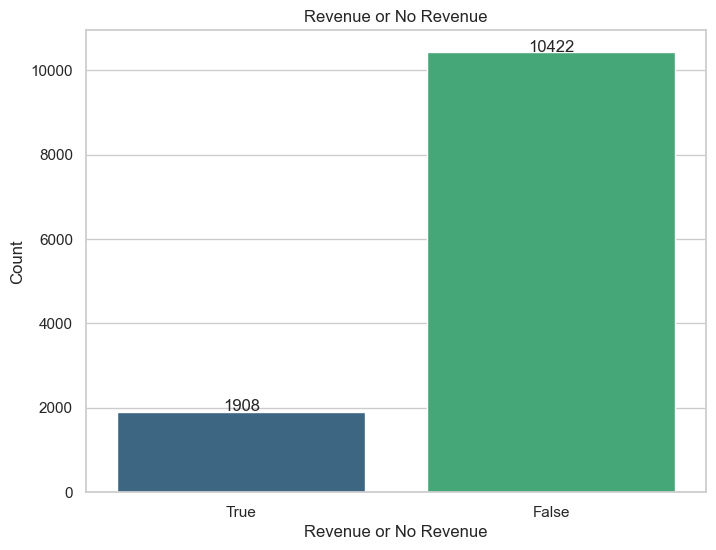

In [152]:
# Visualize Target Variable "Revenue"

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Revenue', data=dataDF, palette='viridis', order=[True, False])
plt.title('Revenue or No Revenue')
plt.xlabel('Revenue or No Revenue')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Conclusion: Distribution of the Target Variable is imbalanced because "No Revenue" records are significantly higher than "Revenue" records -> biased towards "No Revenue"

# Rectification: Resampling
# 1. Undersampling: Deletion of records will mean losing the data. Not an ideal solution, in this case.
# 2. Oversampling: It will oversample the minority class to balance the distribution of the Target Variable.

# Approach for Oversampling: SMOTE (Synthetic Minority Over-sampling Technique)

In [153]:
# Oversampling using SMOTE

X = dataDF.copy()
X.drop('Revenue', axis=1, inplace=True)
Y = dataDF["Revenue"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only to avoid data leakage
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Now X_train_resampled and Y_train_resampled contain the oversampled data

In [154]:
print("X Train shape:", X_train_resampled.shape)
print("Y Train shape:", Y_train_resampled.shape)
print("X Test shape:", X_test.shape)
print("Y Test shape:", Y_test.shape)

X Train shape: (16734, 17)
Y Train shape: (16734,)
X Test shape: (2466, 17)
Y Test shape: (2466,)


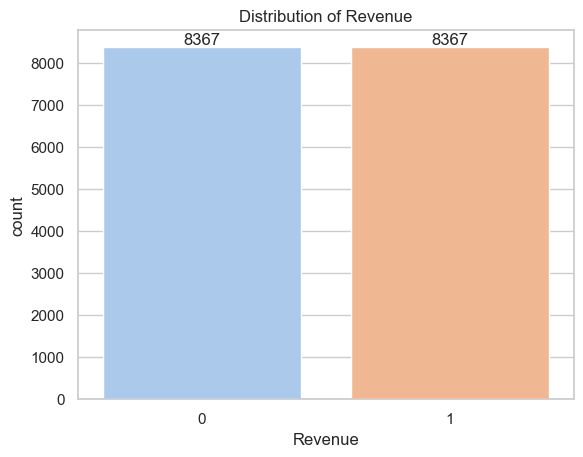

In [155]:
Y_train_resampled_DF = Y_train_resampled.to_frame(name='Revenue')
sns.countplot(x='Revenue', data=Y_train_resampled_DF)
# Calculate count values for 0s and 1s
counts = Y_train_resampled_DF['Revenue'].value_counts()
# Annotate the count values on top of the bars
for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Distribution of Revenue')
plt.show()

In [ ]:
# Model Development and Evaluation

In [156]:
# Logistic Regression

LR_Model = LogisticRegression()
LR_Model.fit(X_train_resampled, Y_train_resampled)

Y_pred = LR_Model.predict(X_test)
print("Y Prediction:",Y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:\t", metrics.accuracy_score(Y_test, Y_pred))
print("Precision :\t", metrics.precision_score(Y_test, Y_pred))
print("Recall :\t", metrics.recall_score(Y_test, Y_pred))
print("F1-Score :\t", metrics.f1_score(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, LR_Model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC:\t", auc)
print("Confusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", metrics.classification_report(Y_test, Y_pred))

Y Prediction: [0 0 0 ... 0 1 0]

Evaluation Metrics:
Accuracy:	 0.8746958637469586
Precision :	 0.6045081967213115
Recall :	 0.7177615571776156
F1-Score :	 0.6562847608453838
ROC-AUC:	 0.8119221411192212
Confusion Matrix:
 [[1862  193]
 [ 116  295]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      2055
           1       0.60      0.72      0.66       411

    accuracy                           0.87      2466
   macro avg       0.77      0.81      0.79      2466
weighted avg       0.89      0.87      0.88      2466



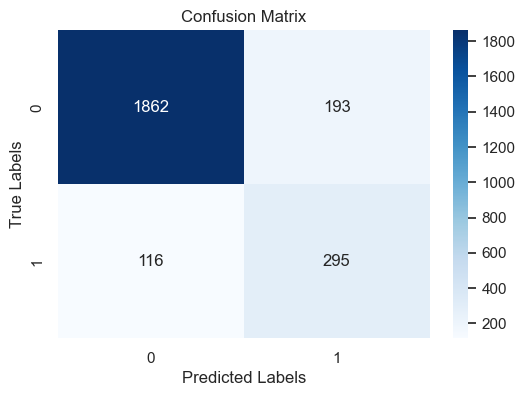

In [157]:
# Visualization of Confusion Matrix

plt.figure(figsize=(6, 4))
sns.heatmap(metrics.confusion_matrix(Y_test, Y_pred), annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

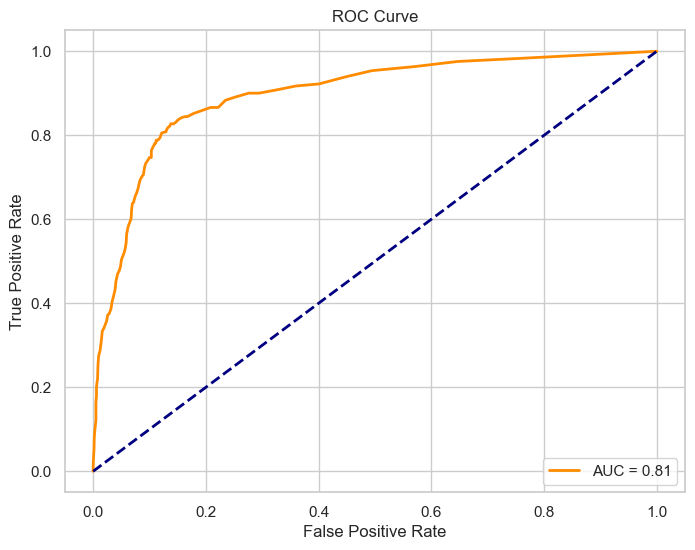

In [162]:
# Visualization of ROC AUC Curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [160]:
# Decision Tree

DTCModel = DecisionTreeClassifier()
DTCModel = DTCModel.fit(X_train_resampled, Y_train_resampled)

Y_pred = DTCModel.predict(X_test)
print("Y Prediction:", Y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:\t", metrics.accuracy_score(Y_test, Y_pred))
print("Precision :\t", metrics.precision_score(Y_test, Y_pred))
print("Recall :\t", metrics.recall_score(Y_test, Y_pred))
print("F1-Score :\t", metrics.f1_score(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, DTCModel.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC:\t", auc)
print("Confusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", metrics.classification_report(Y_test, Y_pred))

Y Prediction: [0 1 0 ... 0 1 0]

Evaluation Metrics:
Accuracy:	 0.8349553933495539
Precision :	 0.5045454545454545
Recall :	 0.5401459854014599
F1-Score :	 0.5217391304347826
ROC-AUC:	 0.7170316301703162
Confusion Matrix:
 [[1837  218]
 [ 189  222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      2055
           1       0.50      0.54      0.52       411

    accuracy                           0.83      2466
   macro avg       0.71      0.72      0.71      2466
weighted avg       0.84      0.83      0.84      2466



In [161]:
# Random Forest

RFModel = RandomForestClassifier()
RFModel.fit(X_train_resampled, Y_train_resampled)

Y_pred = RFModel.predict(X_test)
print("Y Prediction:", Y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:\t", metrics.accuracy_score(Y_test, Y_pred))
print("Precision :\t", metrics.precision_score(Y_test, Y_pred))
print("Recall :\t", metrics.recall_score(Y_test, Y_pred))
print("F1-Score :\t", metrics.f1_score(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, RFModel.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC:\t", auc)
print("Confusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", metrics.classification_report(Y_test, Y_pred))

Y Prediction: [0 0 0 ... 0 1 0]

Evaluation Metrics:
Accuracy:	 0.8795620437956204
Precision :	 0.625
Recall :	 0.6934306569343066
F1-Score :	 0.657439446366782
ROC-AUC:	 0.8051094890510949
Confusion Matrix:
 [[1884  171]
 [ 126  285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      2055
           1       0.62      0.69      0.66       411

    accuracy                           0.88      2466
   macro avg       0.78      0.81      0.79      2466
weighted avg       0.89      0.88      0.88      2466



In [102]:
# Gradient Boosting Machines (XGBoost)

XGB_Model = xgb.XGBClassifier()
XGB_Model.fit(X_train_resampled, Y_train_resampled)

Y_pred = XGB_Model.predict(X_test)
print("Y Prediction:", Y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:\t", metrics.accuracy_score(Y_test, Y_pred))
print("Precision :\t", metrics.precision_score(Y_test, Y_pred))
print("Recall :\t", metrics.recall_score(Y_test, Y_pred))
print("F1-Score :\t", metrics.f1_score(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, XGB_Model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC:\t", auc)
print("Confusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", metrics.classification_report(Y_test, Y_pred))

Y Prediction: [0 1 1 ... 0 1 0]

Evaluation Metrics:
Accuracy:	 0.8828061638280617
Precision :	 0.6588541666666666
Recall :	 0.6155717761557178
F1-Score :	 0.6364779874213836
ROC-AUC:	 0.775912408759124
Confusion Matrix:
 [[1924  131]
 [ 158  253]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2055
           1       0.66      0.62      0.64       411

    accuracy                           0.88      2466
   macro avg       0.79      0.78      0.78      2466
weighted avg       0.88      0.88      0.88      2466



In [103]:
# Naive Bayes

Naive_Bayes_Model = GaussianNB() 
Naive_Bayes_Model.fit(X_train_resampled, Y_train_resampled)

Y_pred = Naive_Bayes_Model.predict(X_test)
print("Y Prediction:", Y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:\t", metrics.accuracy_score(Y_test, Y_pred))
print("Precision :\t", metrics.precision_score(Y_test, Y_pred))
print("Recall :\t", metrics.recall_score(Y_test, Y_pred))
print("F1-Score :\t", metrics.f1_score(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, Naive_Bayes_Model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC:\t", auc)
print("Confusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", metrics.classification_report(Y_test, Y_pred))

Y Prediction: [0 1 1 ... 0 1 0]

Evaluation Metrics:
Accuracy:	 0.7789943227899432
Precision :	 0.4099462365591398
Recall :	 0.7420924574209246
F1-Score :	 0.5281385281385281
ROC-AUC:	 0.7642335766423358
Confusion Matrix:
 [[1616  439]
 [ 106  305]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      2055
           1       0.41      0.74      0.53       411

    accuracy                           0.78      2466
   macro avg       0.67      0.76      0.69      2466
weighted avg       0.85      0.78      0.80      2466



In [104]:
# Support Vector Machines

SVM_Model = SVC(probability=True)
SVM_Model.fit(X_train_resampled, Y_train_resampled)

Y_pred = SVM_Model.predict(X_test)
print("Y Prediction:", Y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:\t", metrics.accuracy_score(Y_test, Y_pred))
print("Precision :\t", metrics.precision_score(Y_test, Y_pred))
print("Recall :\t", metrics.recall_score(Y_test, Y_pred))
print("F1-Score :\t", metrics.f1_score(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, SVM_Model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC:\t", auc)
print("Confusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", metrics.classification_report(Y_test, Y_pred))

Y Prediction: [0 0 1 ... 0 1 0]

Evaluation Metrics:
Accuracy:	 0.8746958637469586
Precision :	 0.6099137931034483
Recall :	 0.6885644768856448
F1-Score :	 0.6468571428571429
ROC-AUC:	 0.800243309002433
Confusion Matrix:
 [[1874  181]
 [ 128  283]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      2055
           1       0.61      0.69      0.65       411

    accuracy                           0.87      2466
   macro avg       0.77      0.80      0.79      2466
weighted avg       0.88      0.87      0.88      2466



In [105]:
# K-Nearest Neighbors (KNN)

KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train_resampled, Y_train_resampled)

Y_pred = KNN_Model.predict(X_test)
print("Y Prediction:", Y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:\t", metrics.accuracy_score(Y_test, Y_pred))
print("Precision :\t", metrics.precision_score(Y_test, Y_pred))
print("Recall :\t", metrics.recall_score(Y_test, Y_pred))
print("F1-Score :\t", metrics.f1_score(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, KNN_Model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC:\t", auc)
print("Confusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", metrics.classification_report(Y_test, Y_pred))

Y Prediction: [1 1 0 ... 0 0 0]

Evaluation Metrics:
Accuracy:	 0.7721005677210057
Precision :	 0.37763371150729336
Recall :	 0.5669099756690997
F1-Score :	 0.45330739299610895
ROC-AUC:	 0.6900243309002433
Confusion Matrix:
 [[1671  384]
 [ 178  233]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.86      2055
           1       0.38      0.57      0.45       411

    accuracy                           0.77      2466
   macro avg       0.64      0.69      0.65      2466
weighted avg       0.82      0.77      0.79      2466



In [106]:
# Dummy Classifier: 
# This model is used as a reference point for comparing the performance of other classifiers.
# It is called "dummy" because it makes predictions using simple rules without learning from the data.
# Strategy: "stratified" because it generates predictions by respecting the training set's class distribution

Dummy_Model = DummyClassifier(strategy='stratified')
Dummy_Model.fit(X_train, Y_train)

Y_pred = Dummy_Model.predict(X_test)
print("Y Prediction:", Y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:\t", metrics.accuracy_score(Y_test, Y_pred))
print("Precision :\t", metrics.precision_score(Y_test, Y_pred))
print("Recall :\t", metrics.recall_score(Y_test, Y_pred))
print("F1-Score :\t", metrics.f1_score(Y_test, Y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred))
fpr, tpr, thresholds = roc_curve(Y_test, Dummy_Model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC:\t", auc)
print("Classification Report:\n", metrics.classification_report(Y_test, Y_pred))

Y Prediction: [0 1 0 ... 0 0 0]

Evaluation Metrics:
Accuracy:	 0.7197891321978913
Precision :	 0.15517241379310345
Recall :	 0.15328467153284672
F1-Score :	 0.15422276621787026
Confusion Matrix:
 [[1712  343]
 [ 348   63]]
ROC-AUC:	 0.49318734793187347
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      2055
           1       0.16      0.15      0.15       411

    accuracy                           0.72      2466
   macro avg       0.49      0.49      0.49      2466
weighted avg       0.72      0.72      0.72      2466



In [40]:
# Cross Validation

from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5)

score_LR = cross_val_score(LR_Model, X_train_resampled, Y_train_resampled, cv=kf)
print("Cross Validation Scores for Logistic Regression: {} ".format(score_LR))
print("Average Cross Validation score for Logistic Regression: {}".format(score_LR.mean()))

score_DTC = cross_val_score(DTCModel, X_train_resampled, Y_train_resampled, cv=kf)
print("\nCross Validation Scores for Decision Tree: {} ".format(score_DTC))
print("Average Cross Validation score for Decision Tree: {}".format(score_DTC.mean()))

score_RF = cross_val_score(RFModel, X_train_resampled, Y_train_resampled, cv=kf)
print("\nCross Validation Scores for Random Forest: {} ".format(score_RF))
print("Average Cross Validation score for Random Forest: {}".format(score_RF.mean()))

score_XGB = cross_val_score(XGB_Model, X_train_resampled, Y_train_resampled, cv=kf)
print("\nCross Validation Scores for XGBoost: {}".format(score_XGB))
print("Average Cross Validation score for XGBoost: {}".format(score_XGB.mean()))

score_NB = cross_val_score(Naive_Bayes_Model, X_train_resampled, Y_train_resampled, cv=kf)
print("\nCross Validation Scores for Naive Bayes: {}".format(score_NB))
print("Average Cross Validation score for Naive Bayes: {}".format(score_NB.mean()))

score_SVM = cross_val_score(SVM_Model, X_train_resampled, Y_train_resampled, cv=kf)
print("\nCross Validation Scores for Support Vector Machines: {}".format(score_SVM))
print("Average Cross Validation score for Support Vector Machines: {}".format(score_SVM.mean()))

score_KNN = cross_val_score(KNN_Model, X_train_resampled, Y_train_resampled, cv=kf)
print("\nCross Validation Scores for KNN: {}".format(score_KNN))
print("Average Cross Validation score for KNN: {}".format(score_KNN.mean()))

Cross Validation Scores for Logistic Regression: [0.83836271 0.84852106 0.83149089 0.58141619 0.57053198] 
Average Cross Validation score for Logistic Regression: 0.7340645671932167

Cross Validation Scores for Decision Tree: [0.84642964 0.86435614 0.85270391 0.93068419 0.92946802] 
Average Cross Validation score for Decision Tree: 0.8847283817162545

Cross Validation Scores for Random Forest: [0.89094712 0.89781894 0.89244099 0.976098   0.97788404] 
Average Cross Validation score for Random Forest: 0.9270378179886851

Cross Validation Scores for XGBoost: [0.89034957 0.90349567 0.89483119 0.98147595 0.98655111]
Average Cross Validation score for XGBoost: 0.9313406962118791

Cross Validation Scores for Naive Bayes: [0.74873021 0.74394981 0.72512698 0.64983567 0.61864913]
Average Cross Validation score for Naive Bayes: 0.6972583596733368

Cross Validation Scores for Support Vector Machines: [0.84911861 0.85419779 0.84075291 0.61338512 0.62432756]
Average Cross Validation score for Suppor

In [69]:
# List of models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("XGBoost", xgb.XGBClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier())
]

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

for name, model in models:
    for metric in metrics:
        scores = cross_val_score(model, X_train_resampled, Y_train_resampled, cv=5, scoring=metric)
        print(f"{name}: {metric.capitalize()}: {scores.mean()}, Standard Deviation: {scores.std()}")

Logistic Regression: Accuracy: 0.8096691133596725, Standard Deviation: 0.003986783711500132
Logistic Regression: Precision: 0.8804396308308322, Standard Deviation: 0.008108791059229478
Logistic Regression: Recall: 0.7168620175233753, Standard Deviation: 0.013632506337891398
Logistic Regression: F1: 0.7901348840887505, Standard Deviation: 0.006357512597794083
Logistic Regression: Roc_auc: 0.9007799955235736, Standard Deviation: 0.0065894364261676955
Decision Tree: Accuracy: 0.8846083180894972, Standard Deviation: 0.05555733898266207
Decision Tree: Precision: 0.8813441841589136, Standard Deviation: 0.009851014881606729
Decision Tree: Recall: 0.8868008378198688, Standard Deviation: 0.12938790097273575
Decision Tree: F1: 0.8787964450294309, Standard Deviation: 0.07182511237703874
Decision Tree: Roc_auc: 0.8839385246457725, Standard Deviation: 0.05602926761858656
Random Forest: Accuracy: 0.928231346518128, Standard Deviation: 0.03599048176338766
Random Forest: Precision: 0.9160618955479419,

In [42]:
importances = RFModel.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                               Importance
PageValues                       0.504932
ProductRelated_Duration_hours    0.095048
Administrative                   0.082463
ProductRelated                   0.066850
Administrative_Duration_hours    0.059870
TrafficType                      0.049768
Informational                    0.036860
Region                           0.028308
Informational_Duration_hours     0.020459
OperatingSystems                 0.018990
Browser                          0.017007
VisitorType_Returning_Visitor    0.010147
Weekend                          0.007808
SpecialDay                       0.001125
VisitorType_Other                0.000364
BounceRates                      0.000000
ExitRates                        0.000000


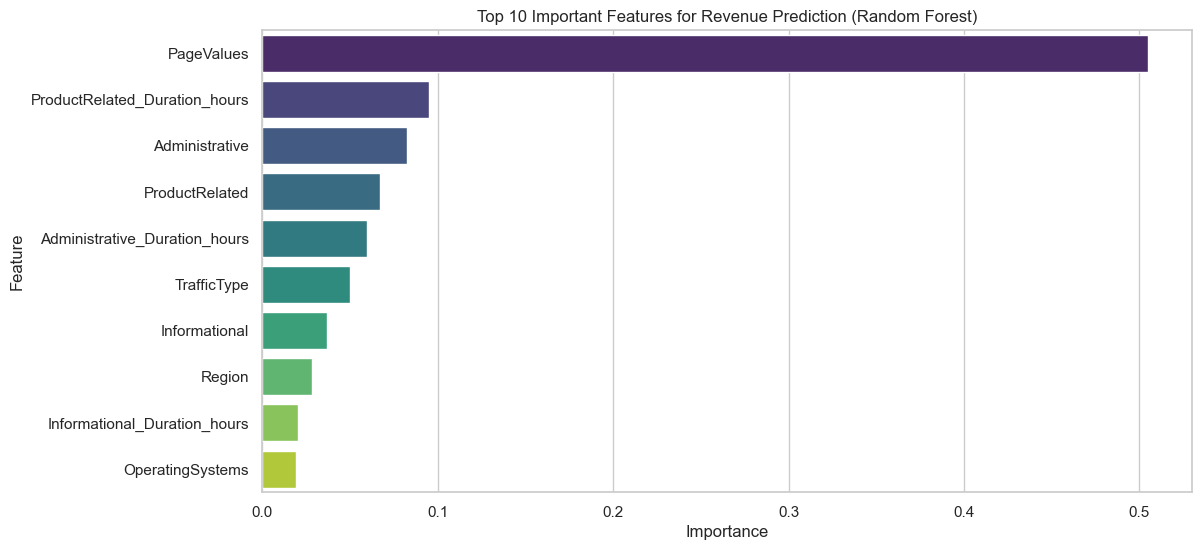

In [43]:
# Plotting feature importances for Random Forest
importances = RFModel.feature_importances_
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importances_df = importances_df.sort_values('Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10), palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features for Revenue Prediction (Random Forest)')
plt.show()

# Conclusion: We can see that the "Page Values" seems to be the most impactful feature by a large margin.

In [44]:
importances = XGB_Model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                               Importance
PageValues                       0.526411
Informational                    0.080322
Administrative                   0.068044
VisitorType_Returning_Visitor    0.053761
TrafficType                      0.052956
OperatingSystems                 0.035510
Region                           0.029400
ProductRelated                   0.024817
SpecialDay                       0.024359
Browser                          0.023373
Weekend                          0.022039
ProductRelated_Duration_hours    0.019087
Administrative_Duration_hours    0.017508
Informational_Duration_hours     0.016829
VisitorType_Other                0.005584
ExitRates                        0.000000
BounceRates                      0.000000


In [45]:
importances = DTCModel.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                               Importance
PageValues                       0.664505
Administrative                   0.061313
ProductRelated_Duration_hours    0.046223
ProductRelated                   0.045846
TrafficType                      0.037659
Administrative_Duration_hours    0.037538
Region                           0.027040
Informational                    0.021329
Browser                          0.017092
Informational_Duration_hours     0.016216
OperatingSystems                 0.013511
Weekend                          0.006556
VisitorType_Returning_Visitor    0.004237
SpecialDay                       0.000775
VisitorType_Other                0.000159
BounceRates                      0.000000
ExitRates                        0.000000
